In [2]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [3]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.dropna(inplace=True)
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   not.fully.paid  
0               0  
1               0  
2               0  
3               0  
4               0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 898.1+ KB


### Visualize/Explore Data - If You Want, You Do You

In [5]:
paid=df[df['not.fully.paid']==0]
unpaid=df[df['not.fully.paid']==1]
dp=paid.fico
dn=unpaid.fico

In [6]:
print('meand and median fico score for people who paid the loan:', dp.mean(),dp.median())
print('meand and median fico score for people who did not pay the loan:', dn.mean(),dn.median())

meand and median fico score for people who paid the loan: 713.3269111249223 707.0
meand and median fico score for people who did not pay the loan: 697.8284409654273 692.0


<AxesSubplot:xlabel='fico', ylabel='Density'>

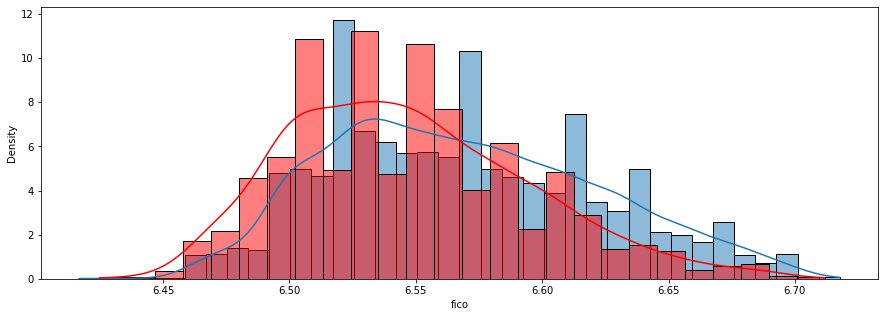

In [7]:
sns.histplot(np.log(dp), kde=True, stat="density")
sns.histplot(np.log(dn), kde=True, stat="density", color='red')

In [8]:
np.var(dp), np.var(dn)

(1460.8713764750414, 1138.7787866757344)

In [9]:
statP, pvalP = ss.ttest_ind(dp, dn)
statP, pvalP

(14.812743547869088, 4.227100096647354e-49)

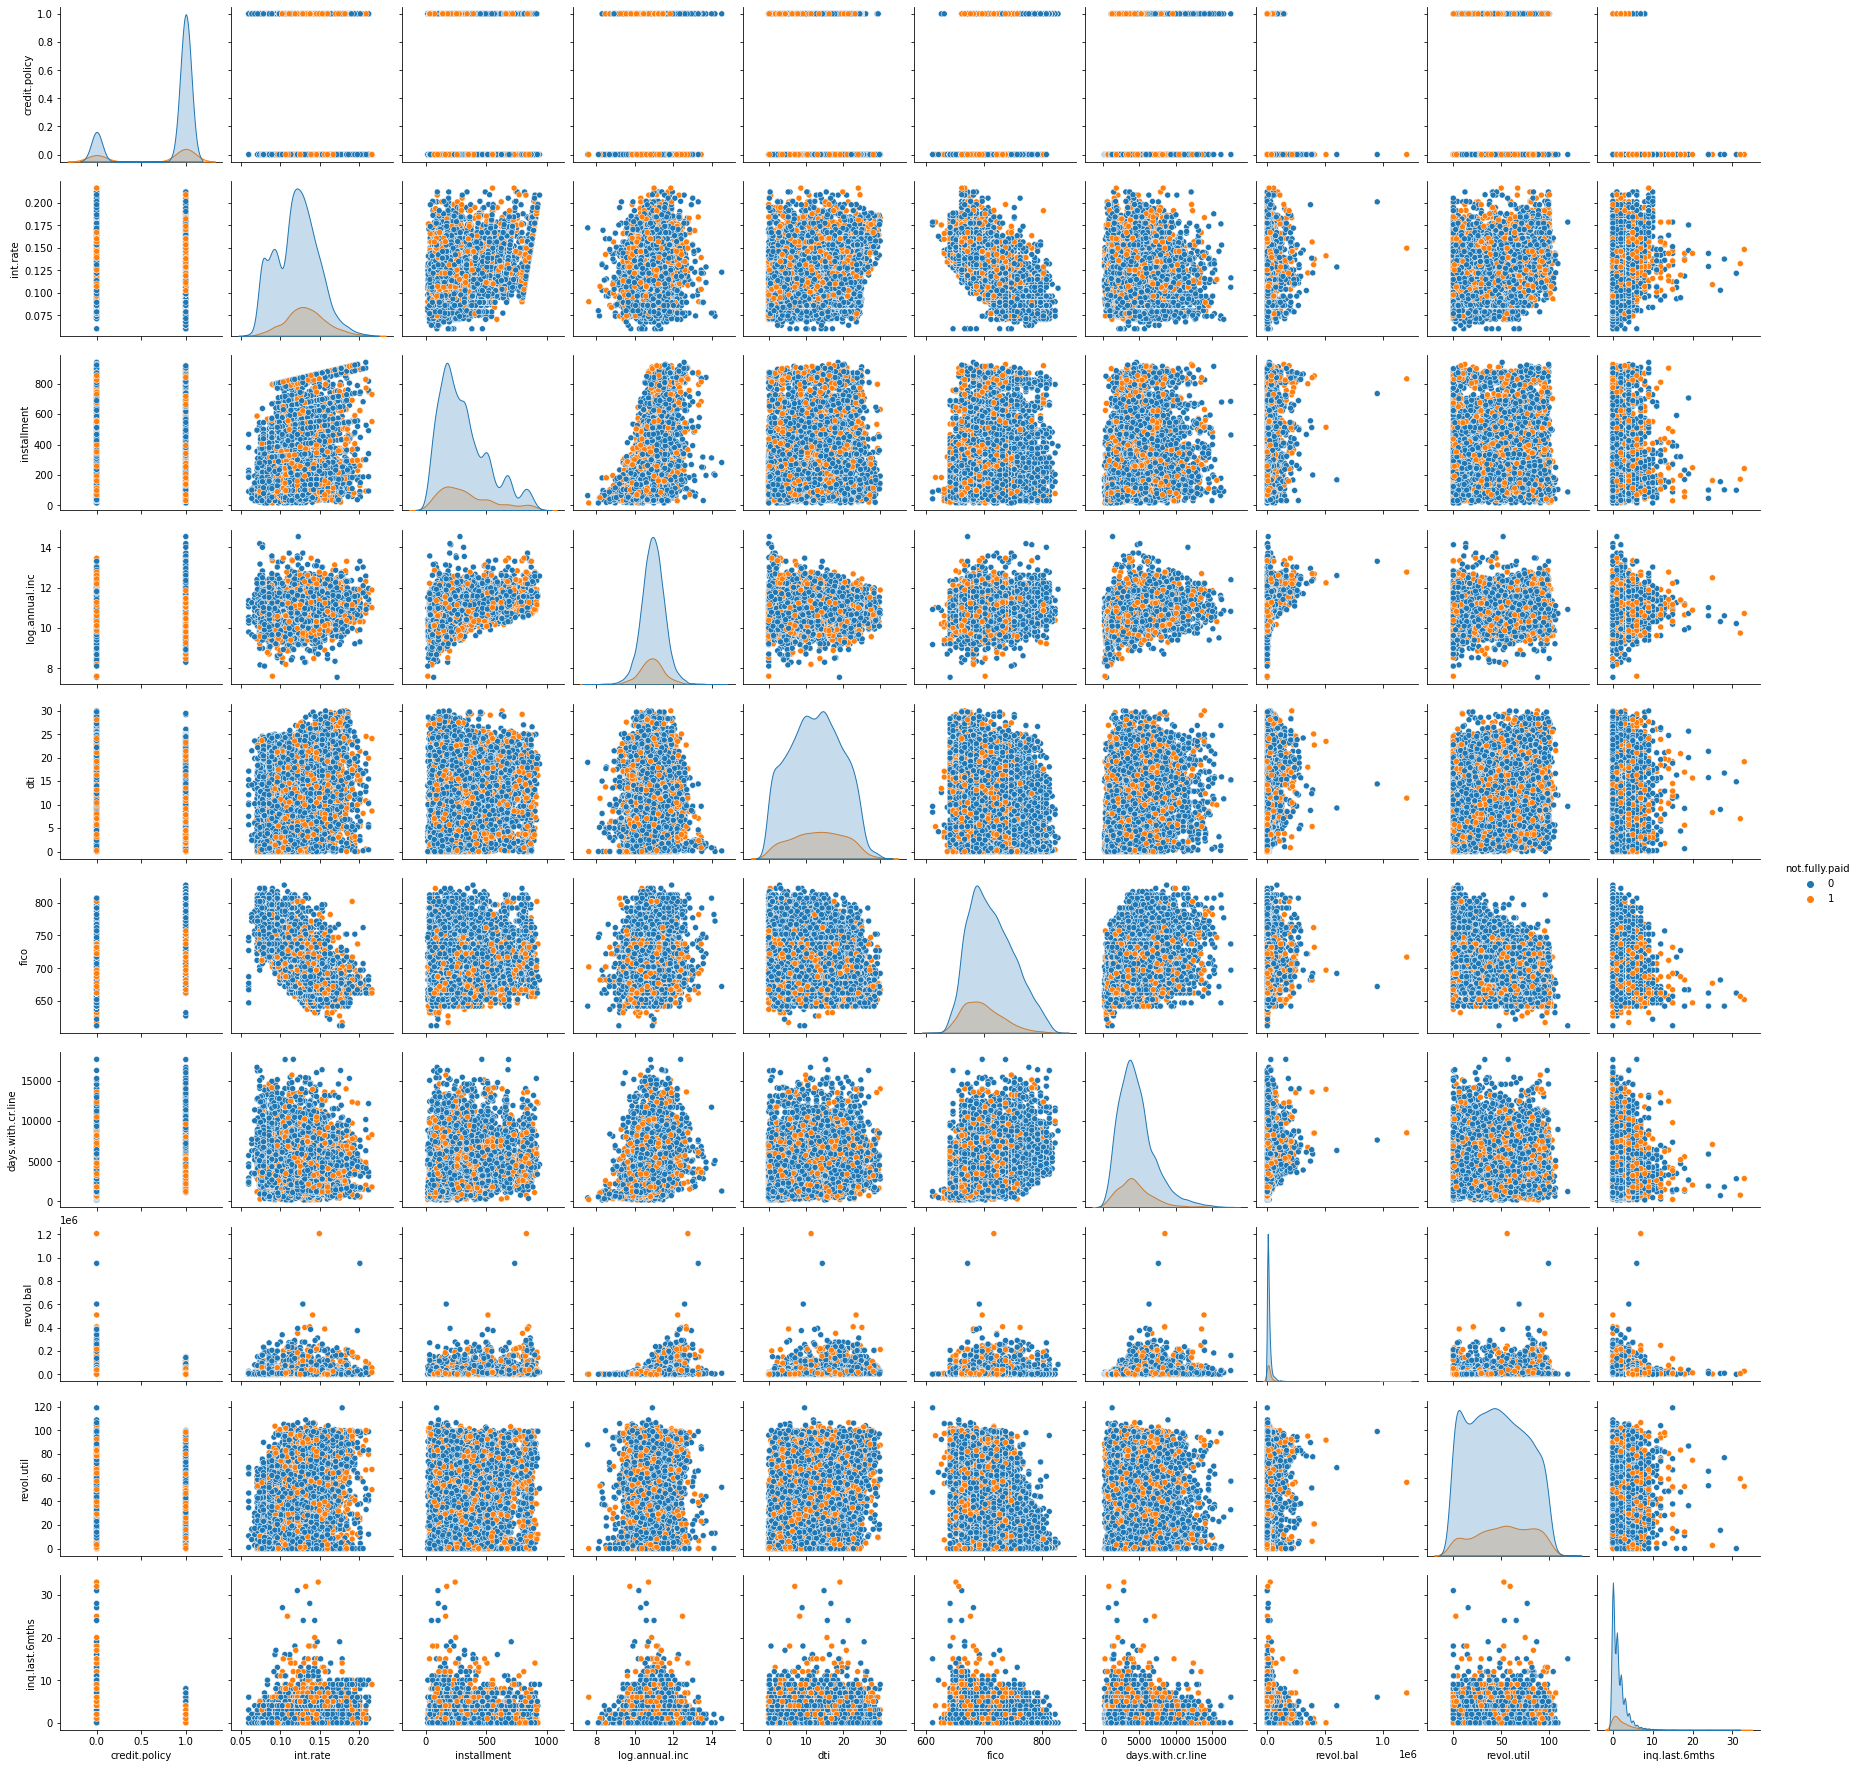

In [10]:
sns.pairplot(df, hue="not.fully.paid")

In [11]:
dpMean, dnMean, dpCount, dnCount = dp.mean(), dn.mean(), dp.count(), dn.count()
dpMean, dnMean, dpCount, dnCount

(713.3269111249223, 697.8284409654273, 8045, 1533)

In [12]:
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(dp, dn)
alpha = .05
nobs = dpCount + dnCount #number of observations 

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces

(1.0, 0.4128025157921774)

In [13]:
worthy=df[df['credit.policy']==1]
unworthy=df[df['credit.policy']==0]
dw=worthy.fico
dnw=unworthy.fico


In [14]:
print('meand and median fico score for people who paid the loan:', dw.mean(),dw.median())
print('meand and median fico score for people who did not pay the loan:', dnw.mean(),dnw.median())

meand and median fico score for people who paid the loan: 717.3560311284047 712.0
meand and median fico score for people who did not pay the loan: 683.978051391863 682.0


<AxesSubplot:xlabel='fico', ylabel='Density'>

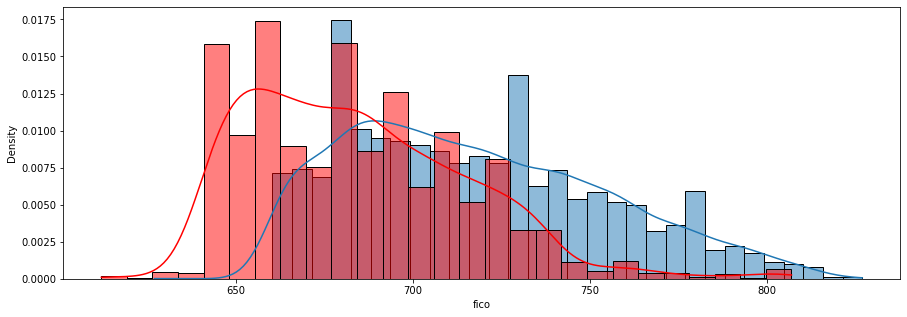

In [15]:
sns.histplot(dw, kde=True, stat="density")
sns.histplot(dnw, kde=True, stat="density", color='red')

In [16]:
np.var(dw), np.var(dnw)

(1341.6339422247272, 957.4497323913657)

In [17]:
statP, pvalP = ss.ttest_ind(dw, dnw)
statP, pvalP

(36.36259987408664, 2.6100416830751396e-271)

In [18]:
dwMean, dnwMean, dwCount, dnwCount = dw.mean(), dnw.mean(), dw.count(), dnw.count()
dwMean, dnwMean, dwCount, dnwCount

(717.3560311284047, 683.978051391863, 7710, 1868)

In [19]:
powerTest = TTestPower()
cesw = thinkstats2.CohenEffectSize(dw, dnw)
alpha = .05
nobsw = dwCount + dnwCount #number of observations 

poww = powerTest.power(effect_size=cesw, nobs=nobsw, alpha=alpha)
poww, cesw

(1.0, 0.9377366905031831)

In [20]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   not.fully.paid  
0               0  
1               0  
2               0  
3               0  
4               0

In [21]:
income_worthy=worthy['log.annual.inc']
income_unworthy=unworthy['log.annual.inc']

In [22]:
np.var(income_worthy), np.var(income_unworthy)

(0.34261438426896657, 0.5214602465319403)

In [23]:
statP, pvalP = ss.ttest_ind(income_worthy, income_unworthy)
statP, pvalP

(3.4178817682392073, 0.0006337324172012597)

In [24]:
inc_worMean, inc_unwMean, inc_worCount, inc_unwCount = income_worthy.mean(), income_unworthy.mean(), income_worthy.count(), income_unworthy.count()
inc_worMean, inc_unwMean, inc_worCount, inc_unwCount

(10.942680001295294, 10.888519880012797, 7710, 1868)

In [25]:
powerTest = TTestPower()
ces1 = thinkstats2.CohenEffectSize(income_worthy, income_unworthy)
alpha = .05
nobs1 = inc_worCount + inc_unwCount #number of observations 

pow1 = powerTest.power(effect_size=ces1, nobs=nobs1, alpha=alpha)
pow1, ces1

(1.0, 0.08813984185782714)

In [26]:
n = powerTest.solve_power(ces1, power=.85, nobs=None, alpha=alpha)
n

1157.6455504969408

In [27]:
df["income"] = np.exp(df["log.annual.inc"])
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   not.fully.paid        income  
0               0  85000.000385  
1               0  65000.000073  
2               0  31999.999943  
3               0  85000.000385  
4               0  80799.999636

In [28]:
w1=df[df['credit.policy']==1]
w2=df[df['credit.policy']==0]
income1=w1["income"]
income2=w2["income"]

In [29]:
statP, pvalP = ss.ttest_ind(income1, income2)
statP, pvalP

(-0.867085312566325, 0.3859169935319443)

In [30]:
inc1Mean, inc2Mean, inc1Count, inc2Count = income1.mean(), income2.mean(), income1.count(), income2.count()
inc1Mean, inc2Mean, inc1Count, inc2Count

(68135.01423906747, 69504.1168943556, 7710, 1868)

In [31]:
powerTest = TTestPower()
ces2 = thinkstats2.CohenEffectSize(income1, income2)
alpha = .05
nobs2 = inc_worCount + inc_unwCount #number of observations 

pow2 = powerTest.power(effect_size=ces2, nobs=nobs2, alpha=alpha)
pow2, ces2

(0.5902673678531368, -0.022360625902235646)

In [32]:
n = powerTest.solve_power(ces2, power=.85, nobs=None, alpha=alpha)
n

17958.783891645737

<AxesSubplot:xlabel='income', ylabel='Density'>

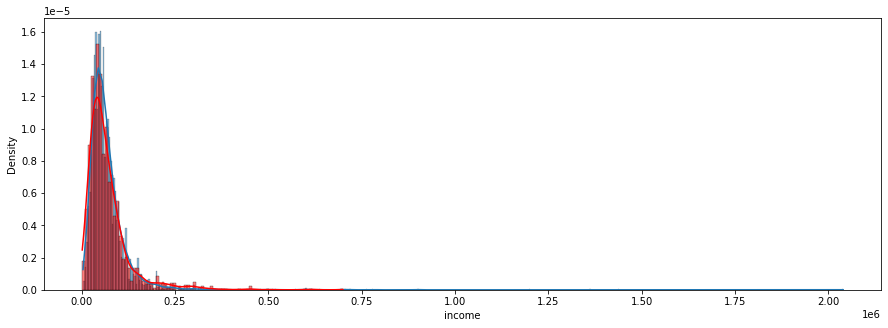

In [33]:
sns.histplot(income1, kde=True, stat="density")
sns.histplot(income2, kde=True, stat="density", color='red')

<AxesSubplot:xlabel='fico', ylabel='Density'>

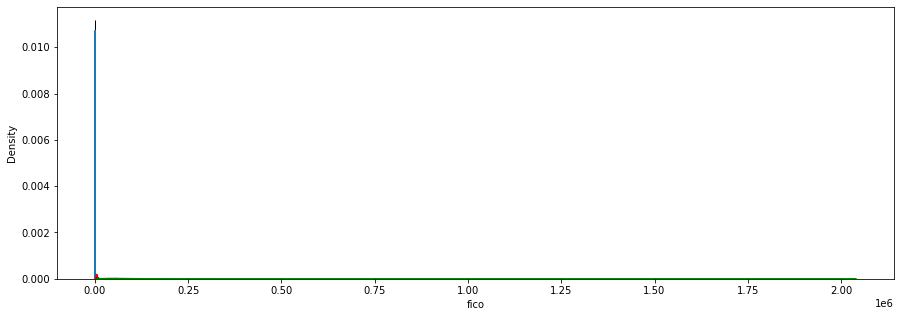

In [34]:
sns.histplot(df['fico'], kde=True, stat="density")
sns.histplot(df['days.with.cr.line'], kde=True, stat="density", color='red')
sns.histplot(df['income'], kde=True, stat="density", color='green')

In [35]:
print(ss.skew(df['fico']))
print(ss.skew(df['days.with.cr.line']))
print(ss.skew(df['income']))

0.47118593325420144
1.1555672187692227
9.592046489493258


In [48]:
bins = np.array([580, 670, 740, 800])
indicies = np.digitize(df["fico"], bins)
groups = df.groupby(indicies)
for i, group in groups:
    print(i, group["fico"].min(), group["fico"].max(), len(group), np.exp(group["log.annual.inc"]).mean(),sum(group['not.fully.paid']),(len(group)/9578))

1 612 667 1341 60231.432107263354 346 0.14000835247442053
2 672 737 6007 67593.95498610557 1006 0.6271664230528294
3 742 797 2085 74025.49061873481 171 0.21768636458550847
4 802 827 145 96581.13203052751 10 0.015138859887241595


In [45]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  not.fully.paid        income  
count     9578.000000     9578.000000  9.578000e+03  
mean         1.577469        0.160054  6.840203e+04  
std          2.200245        0.366676  6.122753e+04  
min          0.000000        0.000000  1.896000e+03  
25%          0.000000        0.000000  3.850000e+04  
50%          1.000000        0.000000  5.576400e+04  
75%          2.000000        0.000000  8.012100e+04  
max         33.000000        1.000000  2.039784e+06

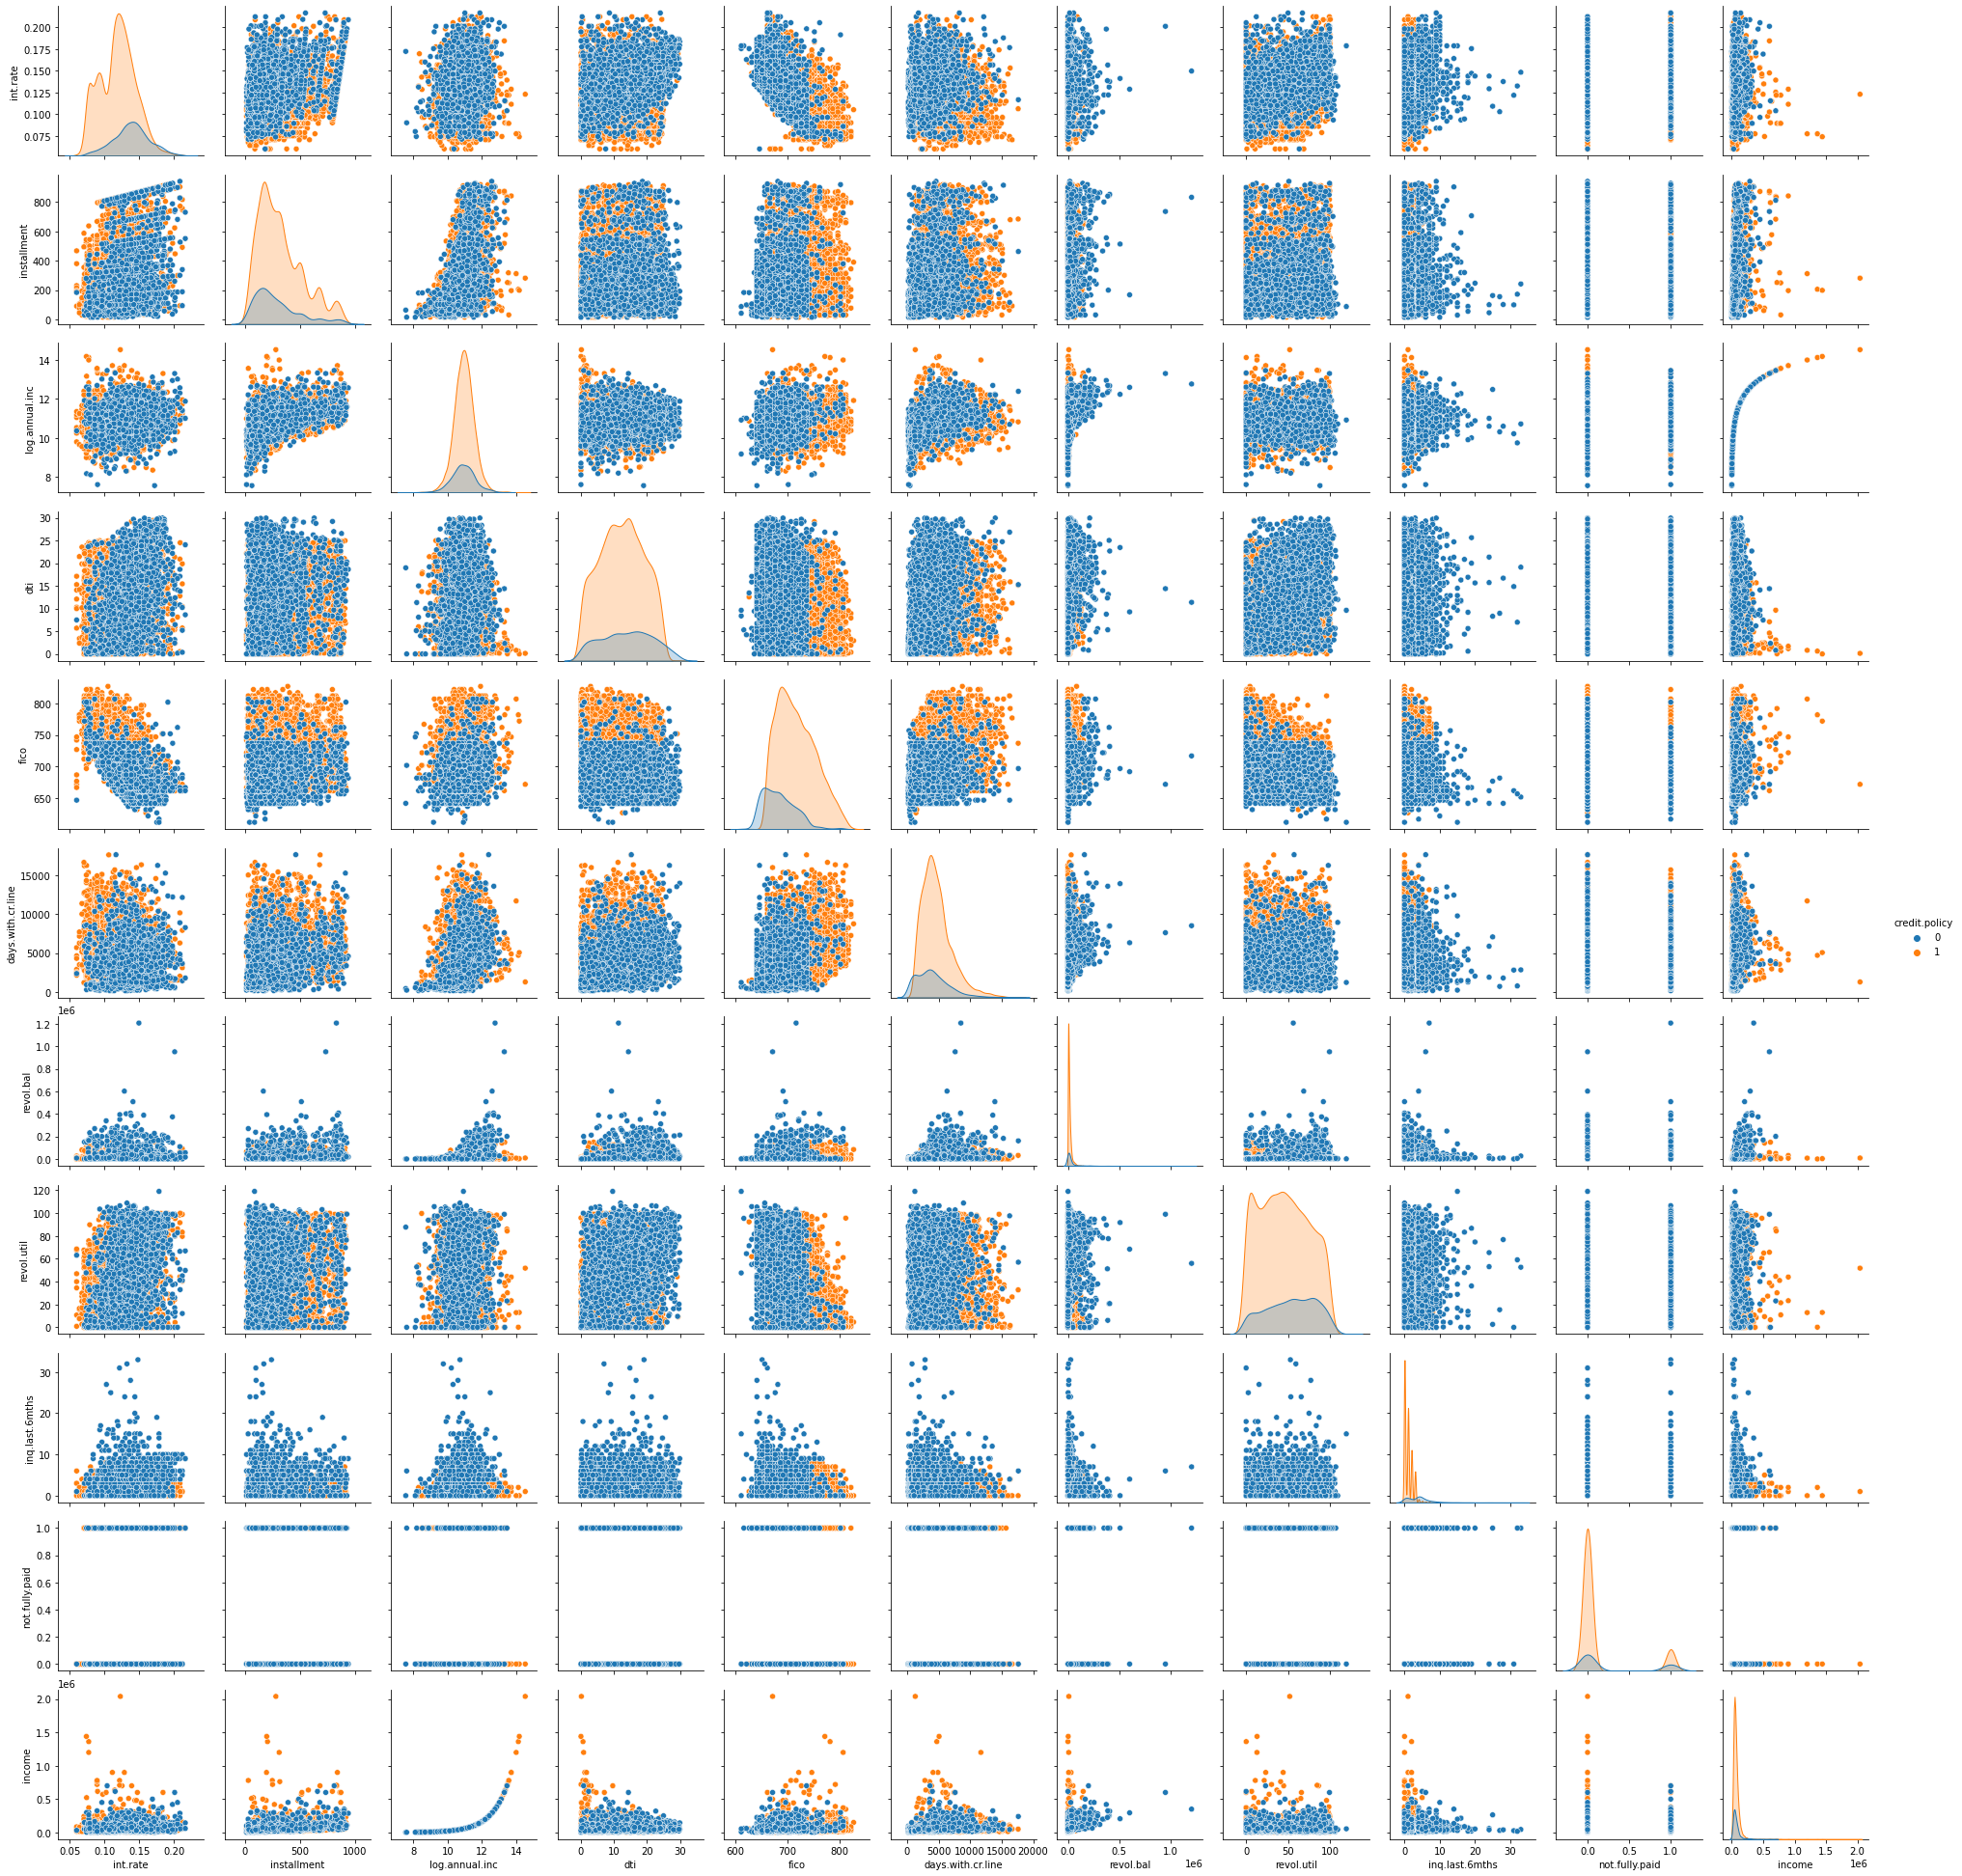

In [40]:
sns.pairplot(df,hue='credit.policy')

## Solutions